<a href="https://colab.research.google.com/github/ab-rohman/Computer_Vision/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install cvlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 7.7 MB/s 
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046385 sha256=a0d5f238a2bd6e02953a3c1b8d299b429040887143bbee27e5def28b8e68c489
  Stored in directory: /root/.cache/pip/wheels/8e/d7/31/bc643bd3a8b11a7368b1ab1d8a6299b33b462ed0b0683ddc5a
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=381c92a09cccaecae68647514de2bf01fc7f6730e7afcee5d9da09e77045c832
  Stored in directory: /root/.cache/pip/wheels/f0/fd/1f/3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
Successfully built cvlib progressbar


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox
from numpy.lib.polynomial import poly

In [8]:
image = cv2.imread("/content/drive/MyDrive/PCVK/CAR/5.jpg")
box, label, count = cv.detect_common_objects(image)
output = draw_bbox(image, box, label, count)
plt.imshow(output)
plt.show()
print("Number of cars in this image are " +str(label.count('car')))

error: ignored

In [ ]:


image = cv2.imread("MyDrive/PCVK/1.jpg")
box, label, count = cv.detect_common_objects(image)
output = draw_bbox(image, box, label, count)
plt.imshow(output)
plt.show()
print("Number of cars in this image are " +str(label.count('car')))

AttributeError: ignored

In [ ]:
# import the necessary packages
import argparse
import imutils
import cv2
# construct the argument parser and parse the arguments
'''ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True,
	help="path to input image")
args = vars(ap.parse_args())'''

'ap = argparse.ArgumentParser()\nap.add_argument("-i", "--image", required=True,\n\thelp="path to input image")\nargs = vars(ap.parse_args())'

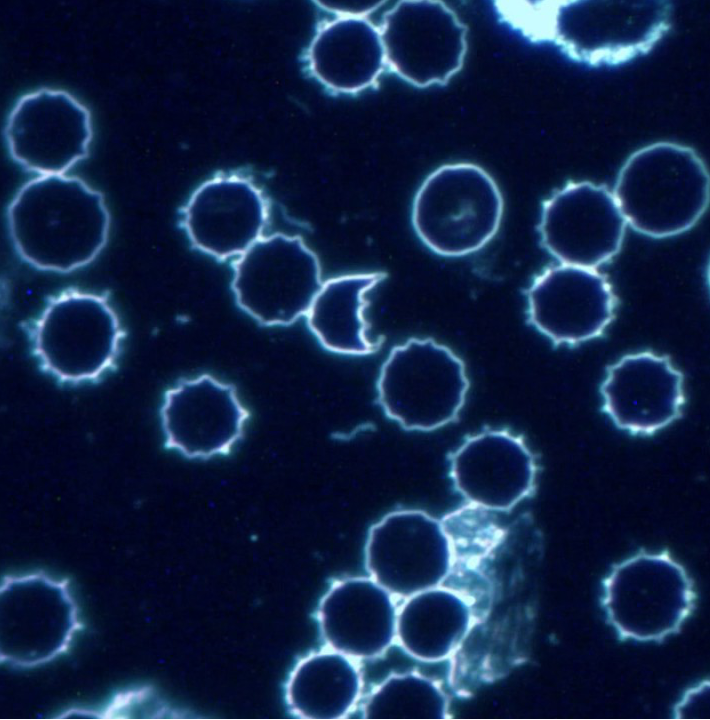

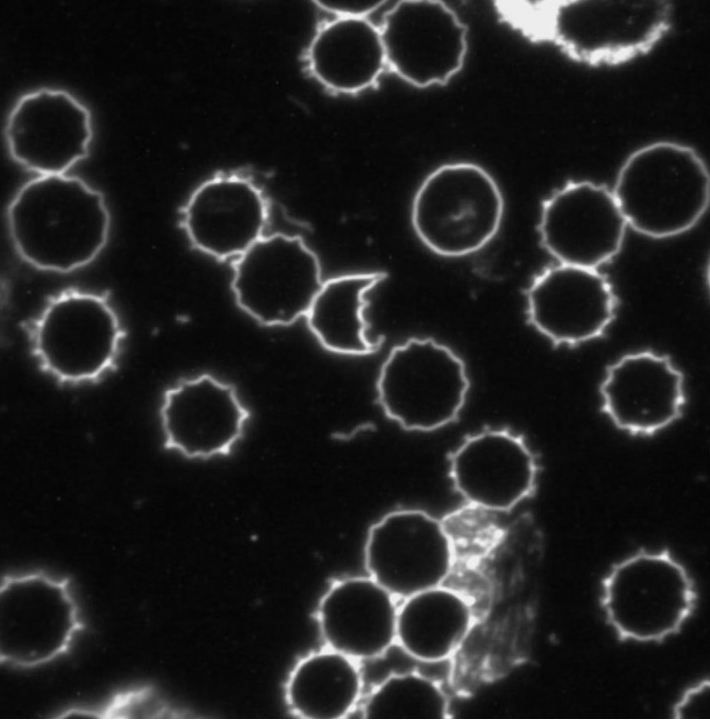

In [ ]:
# load the input image (whose path was supplied via command line
# argument) and display the image to our screen
image = cv2.imread("/content/drive/MyDrive/PCVK/Bakteri/001.png")
#cv2.imshow("Image", image)
from google.colab.patches import cv2_imshow
cv2_imshow(image)


# convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
from google.colab.patches import cv2_imshow
cv2_imshow(gray)

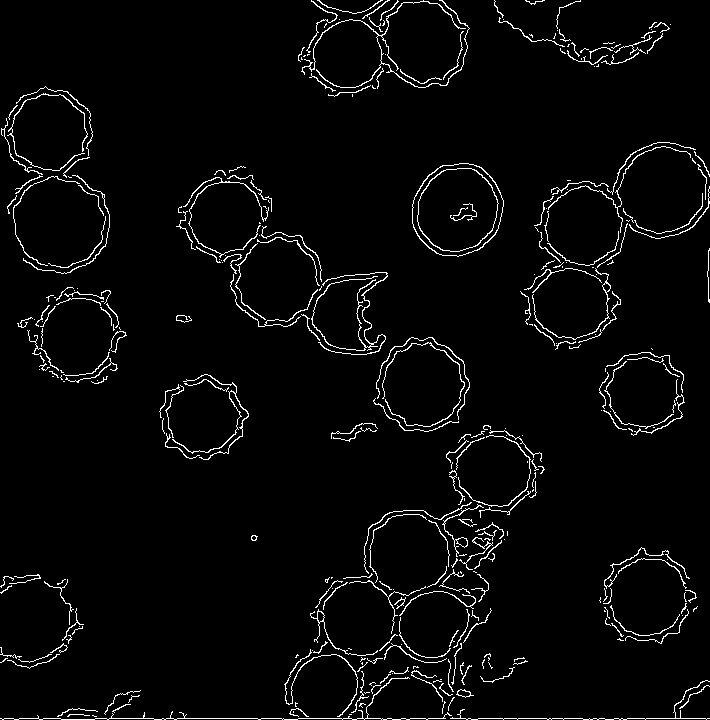

In [ ]:
# applying edge detection we can find the outlines of objects in
# images
edged = cv2.Canny(gray, 30, 150)

from google.colab.patches import cv2_imshow
cv2_imshow(edged)

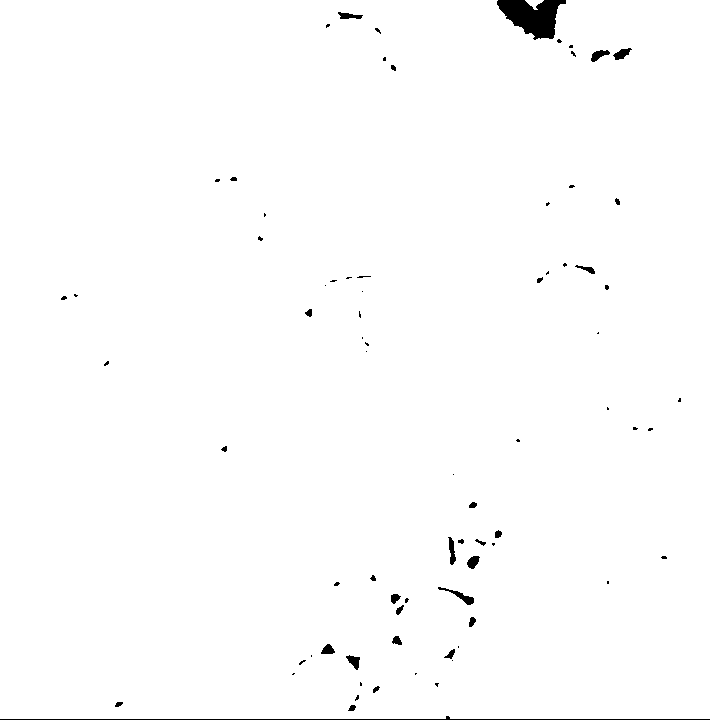

In [ ]:
# threshold the image by setting all pixel values less than 225
# to 255 (white; foreground) and all pixel values >= 225 to 255
# (black; background), thereby segmenting the image
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]

from google.colab.patches import cv2_imshow
cv2_imshow(thresh)

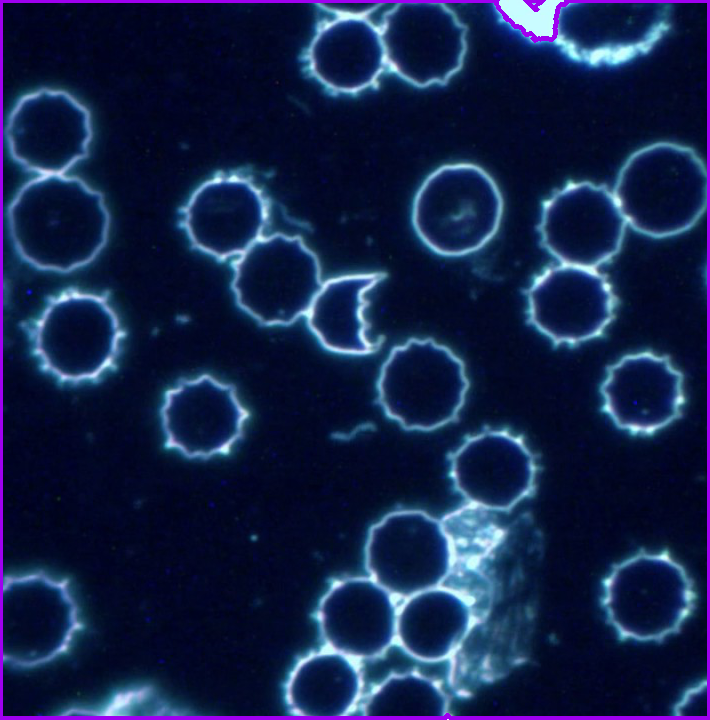

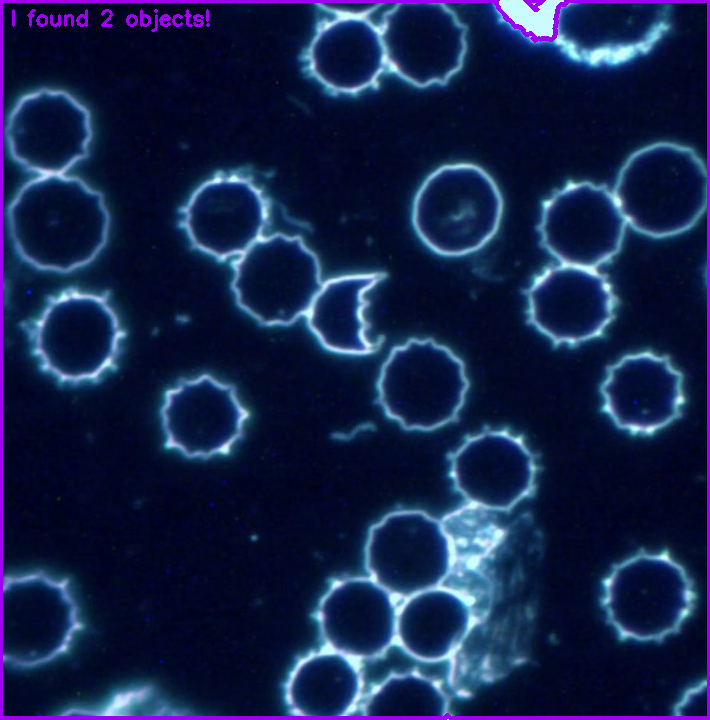

In [ ]:
# find contours (i.e., outlines) of the foreground objects in the
# thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()

# loop over the contours
for c in cnts:
	# draw each contour on the output image with a 3px thick purple
	# outline, then display the output contours one at a time
	cv2.drawContours(output, [c], -1, (240, 0, 159), 3)
cv2_imshow(output)

text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7,
	(240, 0, 159), 2)
cv2_imshow(output)
  

PAKE YG CARA LAIN



In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

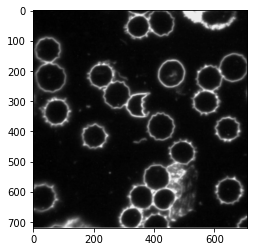

In [7]:
# Get the image
image = cv2.imread("/content/drive/MyDrive/PCVK/Bakteri/001.png")

# Convert image to grayscale
grayed_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(grayed_image, cmap='gray')

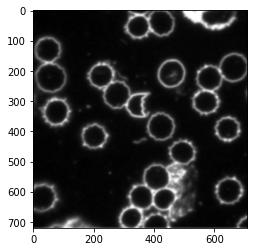

In [ ]:
# Blur the image so as to remove noise
blurred_image = cv2.GaussianBlur(grayed_image, (11,11), 0)
plt.imshow(blurred_image,cmap = 'gray')

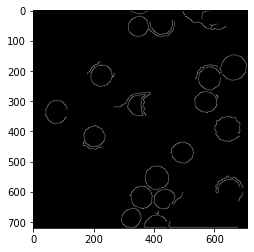

In [ ]:
# Use canny edge detection algorithm to detect the edges
canny = cv2.Canny(blurred_image, 30, 250, 3)
plt.imshow(canny, cmap='gray')

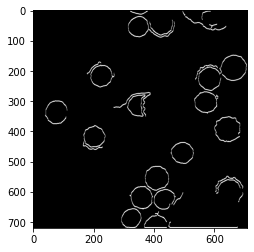

In [ ]:
# Dilate the image to thicken the edges
dilated_image = cv2.dilate(canny, (1,1), iterations = 2)
plt.imshow(dilated_image, cmap='gray')

In [ ]:
# Find contours from the above image
img, count, hierarchy = cv2.findContours(dilated_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Draw the contours on the original image
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, count, -1, (0,255,0), 2)
plt.imshow(rgb)

ValueError: ignored

In [ ]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

In [ ]:
class VehicleDetector:
    def __init__(self):
        # Load Network
        net = cv2.dnn.readNet("D:/Count number of vehicles in images/source code/dnn_model/yolov4.weights", 
                             "D:/Count number of vehicles in images/source code/dnn_model/yolov4.cfg")
        self.model = cv2.dnn_DetectionModel(net)
        self.model.setInputParams(size=(832,832), scale=1/255)
        
        # Allow classes containing cars and trucks only
        # Class 2 corresponds to cars while class 7 corresponds to trucks in yolo coco dataset
        self.classes_allowed = [2, 7]
        
    def detect_vehicles(self, img):
        # Detect Objects
        vehicle_boxes = []
        class_ids, scores, boxes = self.model.detect(img, nmsThreshold=0.4)
        
        for class_id, score, box in zip(class_ids, scores, boxes):
            # skip detection with low confidence score
            if score < 0.5:
                continue
            if class_id in self.classes_allowed:
                vehicle_boxes.append(box)
                
        return vehicle_boxes

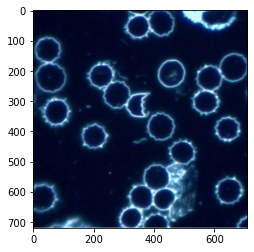

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mp
from PIL import Image
import cv2

image_path = "/content/drive/MyDrive/PCVK/Bakteri/001.png"

f1 = mp.imread(image_path)
plt.imshow(f1)

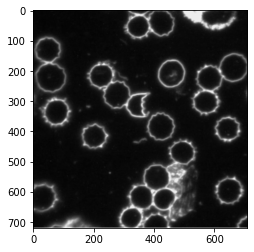

In [ ]:
col = Image.open(image_path)
gray_im = col.convert('L')

plt.imshow(gray_im, cmap="gray", vmin=0, vmax=255)

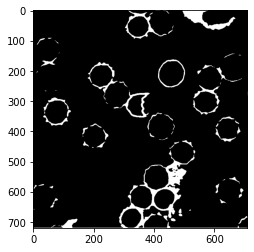

In [ ]:
img = cv2.imread(image_path,0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])

# global thresholding

#For Red Blood Cells 
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

#For Neurons 
#ret1,th1 = cv2.threshold(img,225,255,cv2.THRESH_BINARY) 

plt.imshow(th1, cmap="gray", vmin=0, vmax=255)

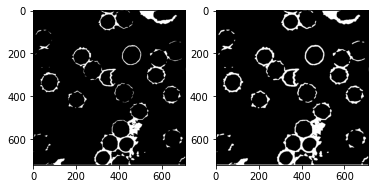

In [ ]:
kernel = np.ones((3,3),np.uint8)

dilate = cv2.dilate(th1,kernel,iterations = 1)
plt.figure; plt.subplot(1,2,1); plt.imshow(th1, cmap = 'gray'); 
plt.subplot(1,2,2); plt.imshow(dilate, cmap = 'gray')

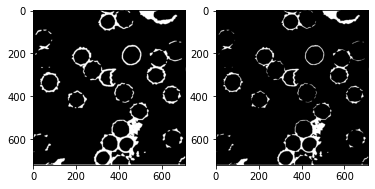

In [ ]:
erosion = cv2.erode(dilate,kernel,iterations = 1)
plt.figure; plt.subplot(1,2,1); plt.imshow(dilate, cmap = 'gray'); 
plt.subplot(1,2,2); plt.imshow(erosion, cmap = 'gray')

objects number is: 76


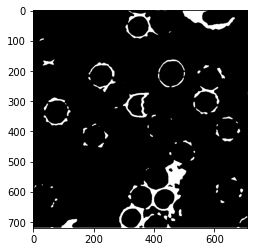

In [ ]:
img_processed = cv2.medianBlur(erosion, 7)
ret, labels = cv2.connectedComponents(img_processed)
print('objects number is:', ret-1)
plt.imshow(img_processed, cmap = 'gray')

In [ ]:
# Find contours from the above image
img, count, hierarchy = cv2.findContours(dilated_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Draw the contours on the original image
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, count, -1, (0,255,0), 2)
plt.imshow(rgb)

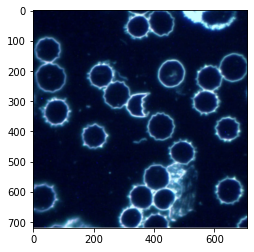

In [ ]:
image = cv2.imread("/content/drive/MyDrive/PCVK/Bakteri/001.png")

#Image in Real Color
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

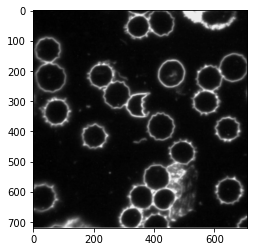

In [ ]:
#Showing image in gray color
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), cmap ='gray')

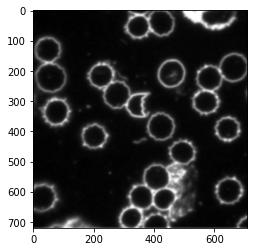

In [ ]:
#Make a blur image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (11,11), 0)
plt.imshow(blur, cmap ='gray')

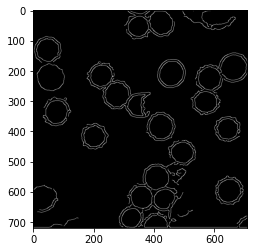

In [ ]:
canny = cv2.Canny(blur, 30, 150, 3)
plt.imshow(canny, cmap ='gray')

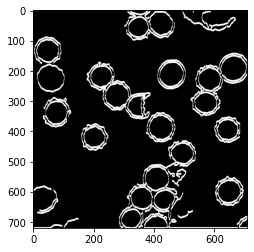

In [ ]:
dilated = cv2.dilate(canny, (1,1), iterations = 5)
plt.imshow(dilated, cmap ='gray')

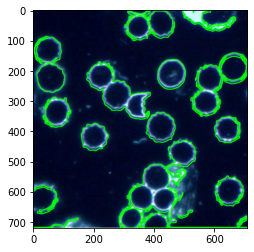

In [ ]:
(cnt, hierarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0,255,0),2)
plt.imshow(rgb)

In [ ]:
len(cnt)

28

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# Display one image
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)
    plt.show()

# Display two images
def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()    

In [74]:
def color_counter(image, color = 'r'):
  try:
      print('Original size',image.shape)
  except AttributeError:
      print("shape not found")
   
  #BGR
  if color == 'r':
    lower_color_bounds = np.array([10,10,100])
    upper_color_bounds = np.array([150,100,255])
  elif color == 'w':  
    lower_color_bounds = np.array([240,240,240])
    upper_color_bounds = np.array([255,255,255])
  elif color == 'b':  
    lower_color_bounds = np.array([5,5,5])
    upper_color_bounds = np.array([90,90,90])  
  else:  
    print('INVALID COLOR')
    return 0

  mask = cv2.inRange(image,lower_color_bounds,upper_color_bounds)
  kernel = np.ones((10,10),np.float32)/100
  image_blur_gray = cv2.filter2D(mask,-1,kernel)
  image_res ,image_thresh = cv2.threshold(image_blur_gray,240,255,cv2.THRESH_BINARY_INV)
  #display_one(image_thresh,'image thresh')

  kernel = np.ones((2,2),np.uint8)
  opening = cv2.morphologyEx(image_thresh,cv2.MORPH_OPEN,kernel) 
  #display_one(opening,'opening')

  last_image = cv2.distanceTransform(opening,cv2.DIST_L2,5)
  ret, last_image =  cv2.threshold(last_image, 0.03*last_image.max(),255,0)
  #display_one(last_image,'last image')

  last_image = last_image.astype(np.uint8)
  cnts = cv2.findContours(last_image, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)[-2]

  display(cv2.cvtColor(image,cv2.COLOR_BGR2RGB),last_image,'original','{} selected'.format(color))
  return(len(cnts)-1)

In [80]:
def color_profile(image):
  display_one(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
  r = color_counter(image,'r')
  g = color_counter(image, 'w')
  b = color_counter(image, 'b')
  print('{} red cars\n{} while cars\n{} black cars'.format(r,g,b))

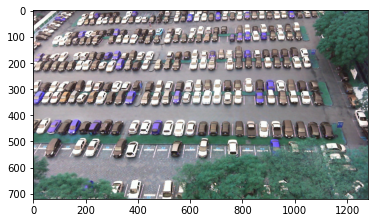

In [85]:
imagetry = cv2.imread("/content/drive/MyDrive/PCVK/CAR/20.jpg")
plt.imshow(imagetry)

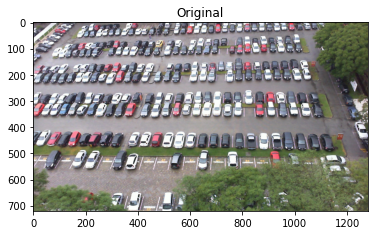

Original size (720, 1280, 3)


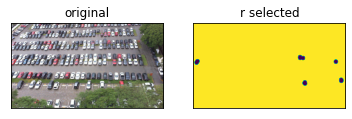

Original size (720, 1280, 3)


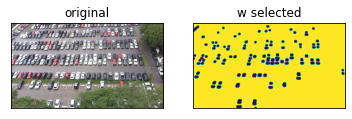

Original size (720, 1280, 3)


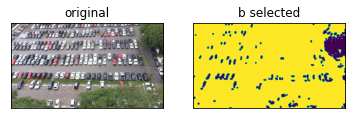

5 red cars
100 while cars
104 black cars


In [86]:
color_profile(imagetry)